In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

In [144]:
df = pd.read_excel('Dataset_TrueCue.xlsx')

In [145]:
df.head()

,Continent,Region,Country Code,Country Name,Year,Woman Education,Cmpl Edu Year,GDP,GDP/capita,Primary Comple Rate,School Enrol_preprimary,School Enrol_primary,School Enrol_2ndary,WBL Index,Unemployment rate Woman,Income Classification,Population
0,Africa,Sub-Saharan Africa,AGO,ANGOLA,2000,7.40054,4.0,9.129635e+09,556.838632,39.50211,89.285824,105.480621,12.266280,62.5,9.1,Low income,2.327997e+07
1,Africa,Sub-Saharan Africa,AGO,ANGOLA,2001,7.40054,4.0,8.936064e+09,527.333529,39.50211,89.285824,105.480621,13.853720,62.5,9.1,Low income,1.694575e+07
2,Africa,Sub-Saharan Africa,AGO,ANGOLA,2002,0.56430,4.0,1.528559e+10,872.494442,39.50211,89.285824,105.480621,14.983590,62.5,9.1,Low income,1.751942e+07
3,Africa,Sub-Saharan Africa,AGO,ANGOLA,2003,7.40054,4.0,1.781271e+10,982.961008,39.50211,89.285824,105.480621,21.991005,62.5,9.1,Low income,1.812148e+07
4,Africa,Sub-Saharan Africa,AGO,ANGOLA,2004,7.40054,4.0,2.355205e+10,1255.564513,39.50211,89.285824,105.480621,21.991005,62.5,26.1,Lower-middle income,1.875814e+07


In [146]:
df.tail()

,Continent,Region,Country Code,Country Name,Year,Woman Education,Cmpl Edu Year,GDP,GDP/capita,Primary Comple Rate,School Enrol_preprimary,School Enrol_primary,School Enrol_2ndary,WBL Index,Unemployment rate Woman,Income Classification,Population
3206,Africa,Sub-Saharan Africa,ZWE,ZIMBABWE,2014,6.09897,7.0,1.949552e+10,1434.896277,93.233849,61.446468,107.888557,45.690294,86.875,5.2,Low income,13586710.0
3207,Africa,Sub-Saharan Africa,ZWE,ZIMBABWE,2015,9.17213,7.0,1.996312e+10,1445.069702,93.233849,61.446468,107.888557,45.690294,86.875,5.2,Low income,13814642.0
3208,Africa,Sub-Saharan Africa,ZWE,ZIMBABWE,2016,8.54473,7.0,2.054868e+10,1464.588957,93.233849,61.446468,107.888557,45.690294,86.875,5.2,Low income,14030338.0
3209,Africa,Sub-Saharan Africa,ZWE,ZIMBABWE,2017,9.68927,7.0,1.901533e+10,1335.665064,93.233849,61.446468,107.888557,45.690294,86.875,5.2,Low income,14236599.0
3210,Africa,Sub-Saharan Africa,ZWE,ZIMBABWE,2018,6.09897,7.0,1.952362e+10,1352.162653,93.233849,61.446468,107.888557,45.690294,86.875,5.2,Low income,14438812.0


In [148]:
df.dtypes

Continent                   object
Region                      object
Country Code                object
Country Name                object
Year                         int64
Woman Education            float64
Cmpl Edu Year              float64
GDP                        float64
GDP/capita                 float64
Primary Comple Rate        float64
School Enrol_preprimary    float64
School Enrol_primary       float64
School Enrol_2ndary        float64
WBL Index                  float64
Unemployment rate Woman    float64
Income Classification       object
Population                 float64
dtype: object

In [149]:
df.isnull().sum()

Continent                    2
Region                       2
Country Code                 0
Country Name                 0
Year                         0
Woman Education            152
Cmpl Edu Year              171
GDP                         22
GDP/capita                  22
Primary Comple Rate        152
School Enrol_preprimary    133
School Enrol_primary        76
School Enrol_2ndary        114
WBL Index                    0
Unemployment rate Woman    152
Income Classification        2
Population                   0
dtype: int64

In [155]:
df = df.dropna()

In [156]:
df.isnull().sum()

Continent                  0
Region                     0
Country Code               0
Country Name               0
Year                       0
Woman Education            0
Cmpl Edu Year              0
GDP                        0
GDP/capita                 0
Primary Comple Rate        0
School Enrol_preprimary    0
School Enrol_primary       0
School Enrol_2ndary        0
WBL Index                  0
Unemployment rate Woman    0
Income Classification      0
Population                 0
dtype: int64

In [157]:
# Columns Consistency
df.columns

Index(['Continent', 'Region', 'Country Code', 'Country Name', 'Year',
       'Woman Education', 'Cmpl Edu Year', 'GDP', 'GDP/capita',
       'Primary Comple Rate', 'School Enrol_preprimary',
       'School Enrol_primary', 'School Enrol_2ndary', 'WBL Index',
       'Unemployment rate Woman', 'Income Classification', 'Population'],
      dtype='object')

In [158]:
# Check For data points
df.shape

(2567, 17)

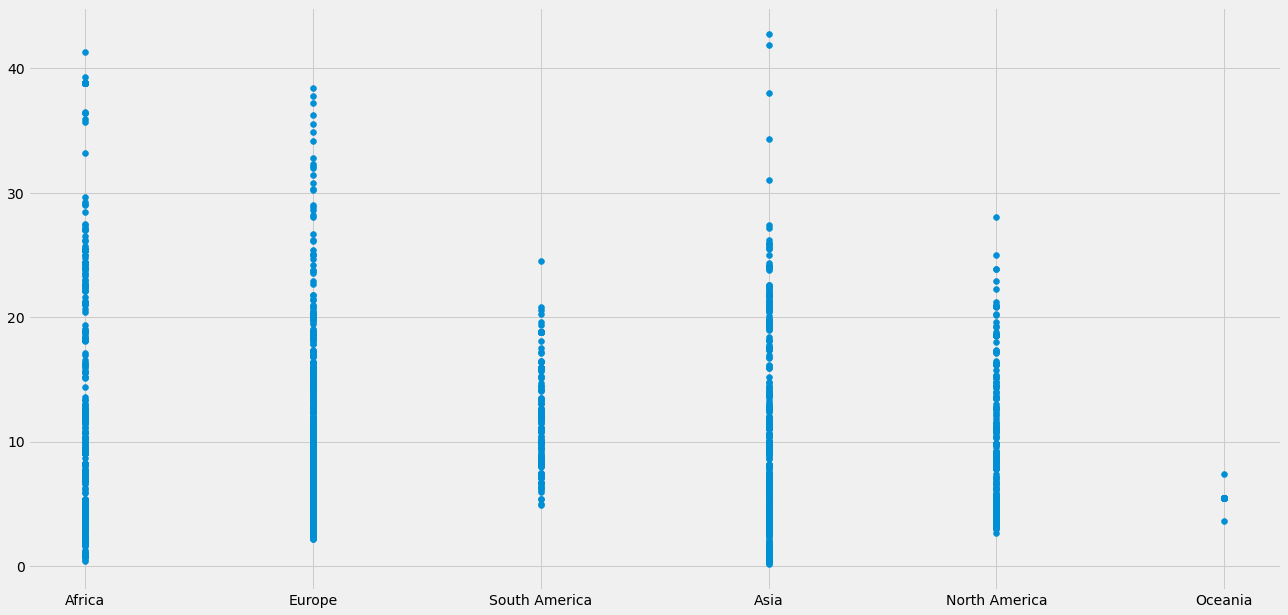

In [159]:
plt.scatter(df['Continent'],df['Unemployment rate Woman'])

In [160]:
from sklearn.cluster import KMeans

In [161]:
# By Assumation we have 7 continents
# k = 7
km = KMeans(n_clusters=7)

In [162]:
# Prep
xfeatures = df[['Cmpl Edu Year','Unemployment rate Woman']]

In [163]:
# Fit n Predict
#df["Continent"] = df.Continent.astype(float)
clusters = km.fit_predict(xfeatures)

In [164]:
# Get all the Labels(Clusters)
km.labels_

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

In [165]:
clusters

array([5, 5, 5, ..., 5, 5, 5], dtype=int32)

In [166]:
clusters is km.labels_

True

In [167]:
km.cluster_centers_

array([[10.34603659,  3.86791159],
       [ 9.20063694, 17.91576433],
       [ 8.37777778, 37.01555556],
       [ 8.96674058, 11.73314856],
       [ 8.74719101, 24.11264045],
       [ 6.25409836,  4.10286885],
       [10.45780969,  7.79057451]])

In [168]:
# Store and Map
df['cluster_complete_edu_yr_vs_unemp_rate_women'] = clusters

In [169]:
df.head()

,Continent,Region,Country Code,Country Name,Year,Woman Education,Cmpl Edu Year,GDP,GDP/capita,Primary Comple Rate,School Enrol_preprimary,School Enrol_primary,School Enrol_2ndary,WBL Index,Unemployment rate Woman,Income Classification,Population,cluster_complete_edu_yr_vs_unemp_rate_women
0,Africa,Sub-Saharan Africa,AGO,ANGOLA,2000,7.40054,4.0,9.129635e+09,556.838632,39.50211,89.285824,105.480621,12.266280,62.5,9.1,Low income,2.327997e+07,5
1,Africa,Sub-Saharan Africa,AGO,ANGOLA,2001,7.40054,4.0,8.936064e+09,527.333529,39.50211,89.285824,105.480621,13.853720,62.5,9.1,Low income,1.694575e+07,5
2,Africa,Sub-Saharan Africa,AGO,ANGOLA,2002,0.56430,4.0,1.528559e+10,872.494442,39.50211,89.285824,105.480621,14.983590,62.5,9.1,Low income,1.751942e+07,5
3,Africa,Sub-Saharan Africa,AGO,ANGOLA,2003,7.40054,4.0,1.781271e+10,982.961008,39.50211,89.285824,105.480621,21.991005,62.5,9.1,Low income,1.812148e+07,5
4,Africa,Sub-Saharan Africa,AGO,ANGOLA,2004,7.40054,4.0,2.355205e+10,1255.564513,39.50211,89.285824,105.480621,21.991005,62.5,26.1,Lower-middle income,1.875814e+07,4


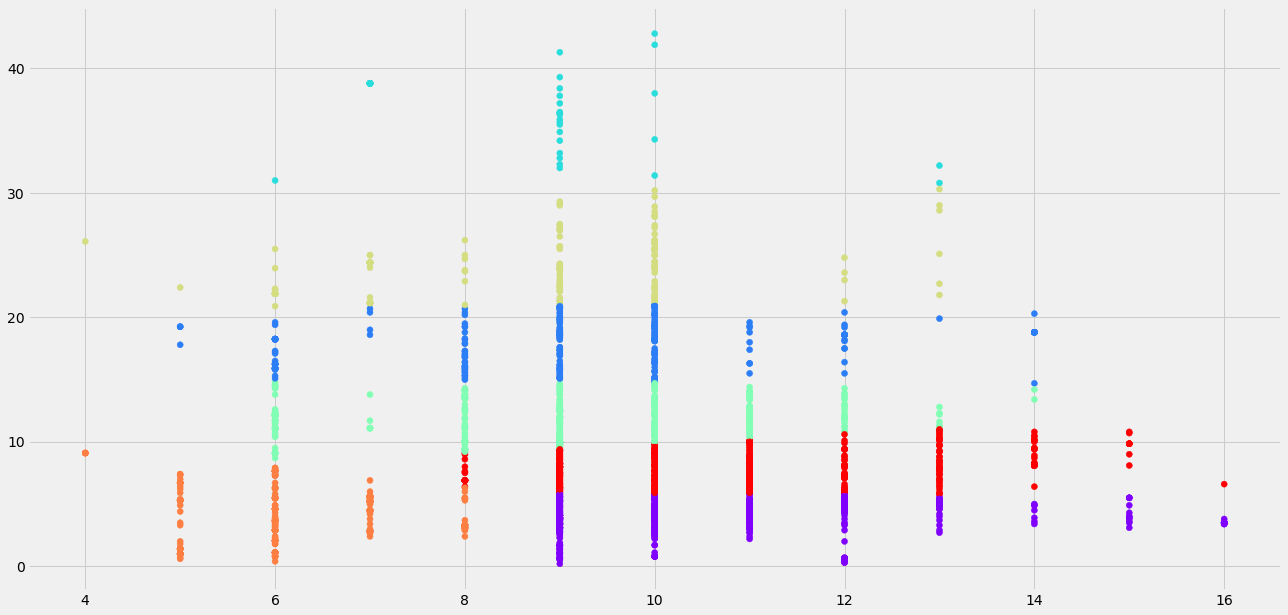

In [170]:
# Plot of our clusters
plt.scatter(df['Cmpl Edu Year'],df['Unemployment rate Woman'],c=df['cluster_complete_edu_yr_vs_unemp_rate_women'],cmap='rainbow')

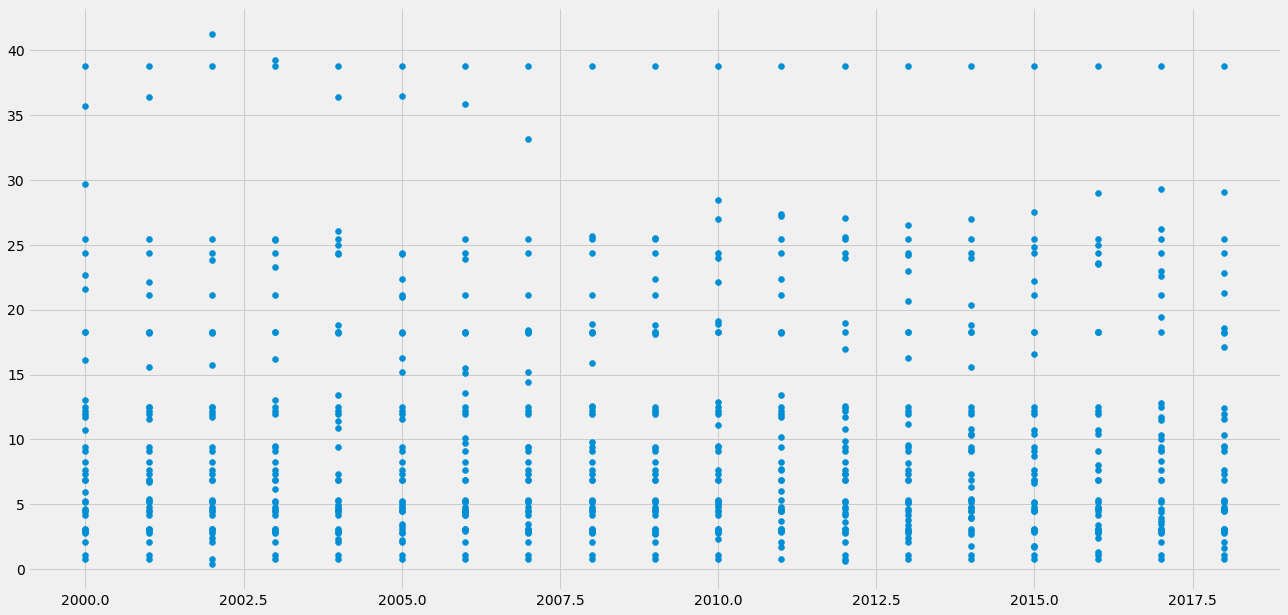

In [171]:
continents = df["Continent"]
# Analyzing Africa
africa = df[df["Continent"] == "Africa"]
plt.scatter(africa["Year"], africa["Unemployment rate Woman"])

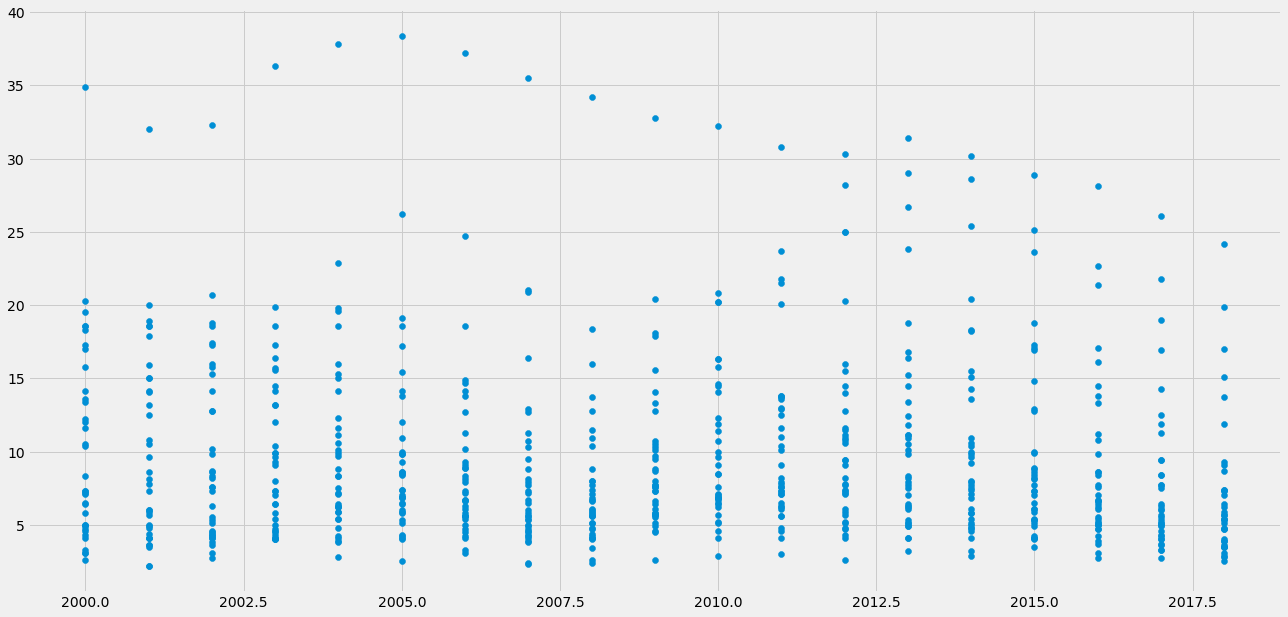

In [172]:
europe = df[df["Continent"] == "Europe"]
plt.scatter(europe["Year"], europe["Unemployment rate Woman"])

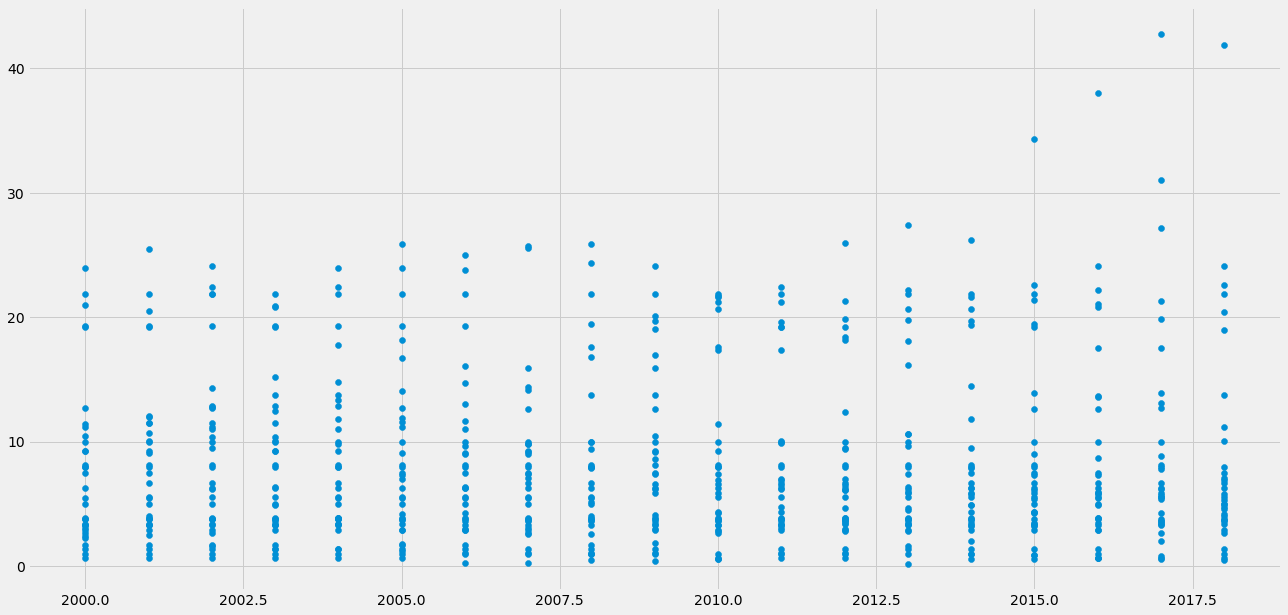

In [173]:
asia = df[df["Continent"] == "Asia"]
plt.scatter(asia["Year"], asia["Unemployment rate Woman"])

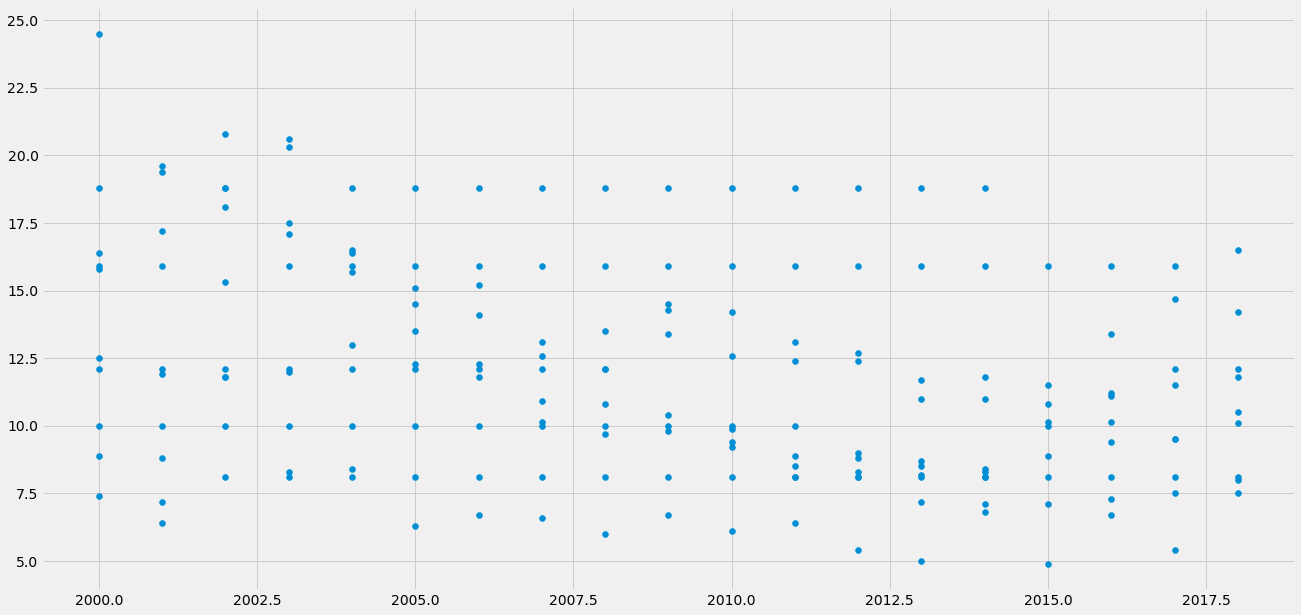

In [174]:
south_america = df[df["Continent"] == "South America"]
plt.scatter(south_america["Year"], south_america["Unemployment rate Woman"])

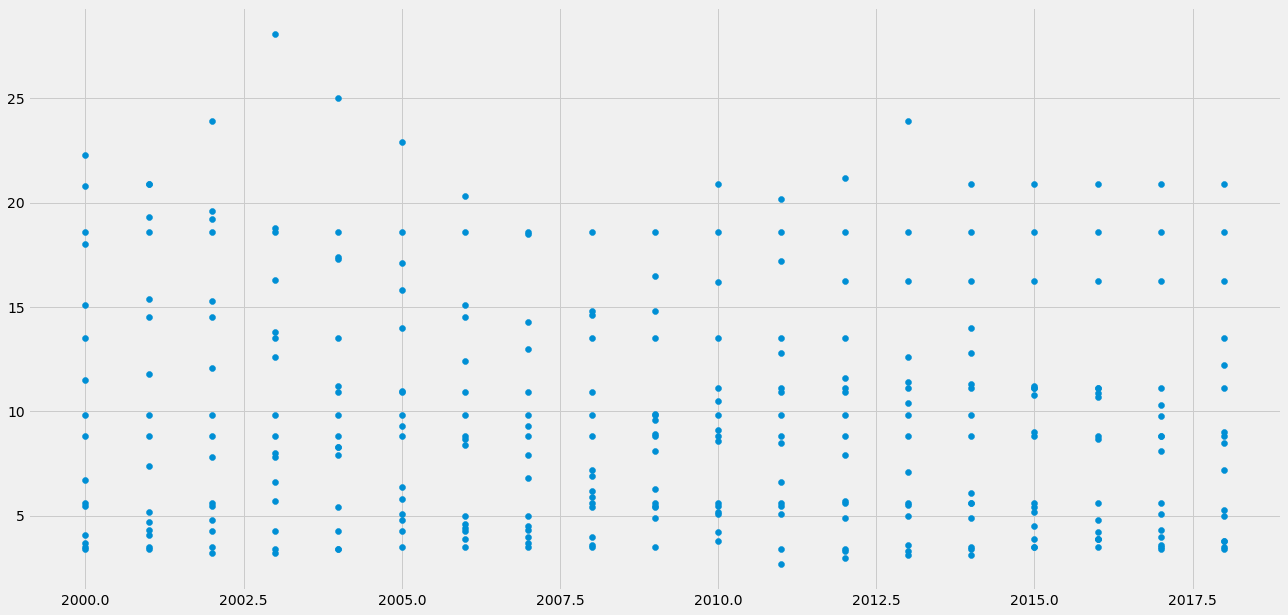

In [175]:
north_america = df[df["Continent"] == "North America"]
plt.scatter(north_america["Year"], north_america["Unemployment rate Woman"])

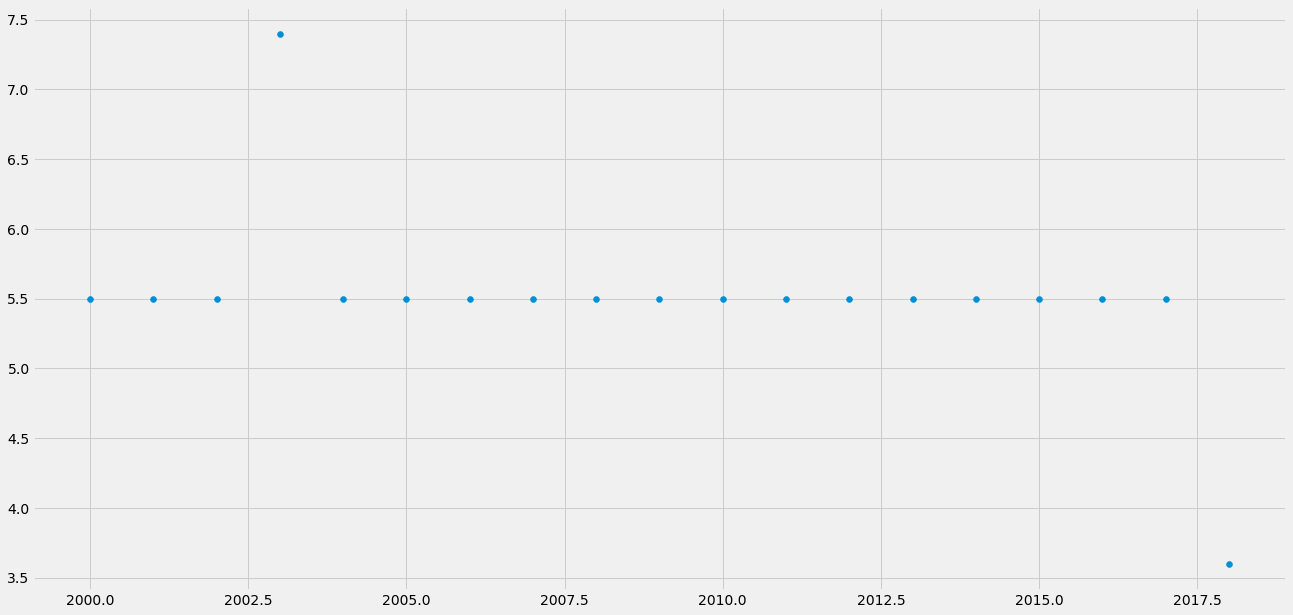

In [176]:
oceania = df[df["Continent"] == "Oceania"]
plt.scatter(oceania["Year"], oceania["Unemployment rate Woman"])

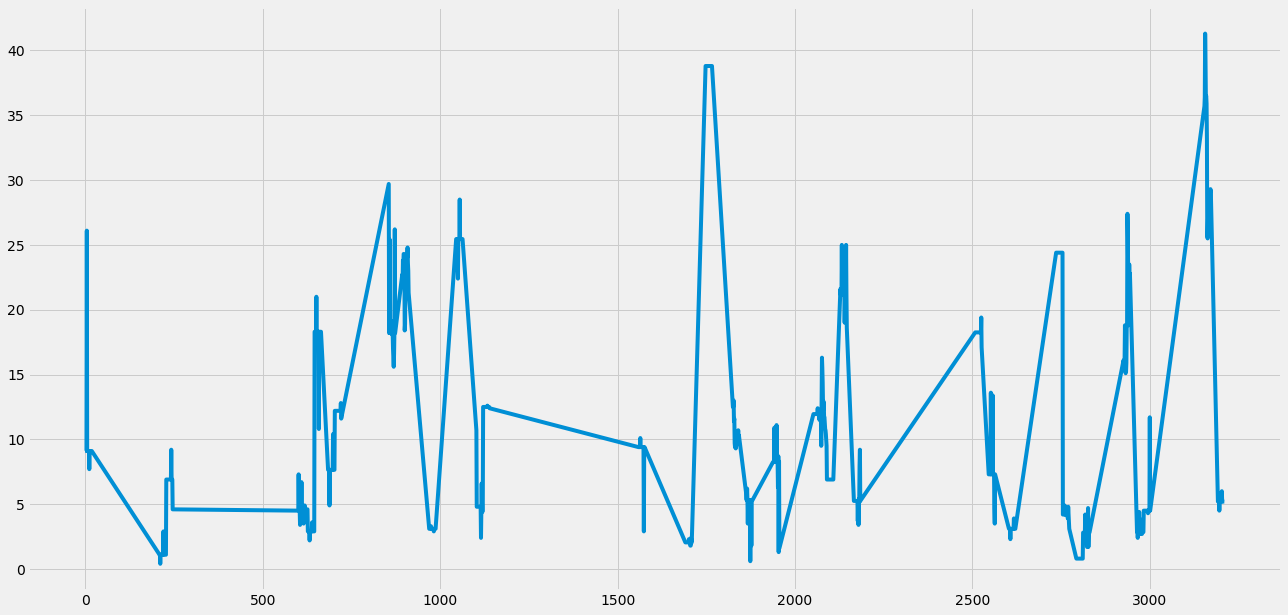

In [177]:
# Africa plot for year/unemployment rate

plt.plot(africa["Unemployment rate Woman"], label = 'unemployment rates in africa for women')